<a href="https://colab.research.google.com/github/GuilleLD/Tarea-ibero/blob/main/Influencers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import xgboost as xgb
from google.colab import files
import io
from sklearn.datasets import load_breast_cancer

## **Primera base de datos**
instagram_global_top_1000.

In [ ]:
uploaded_data = files.upload ()

Saving instagram_global_top_1000.csv to instagram_global_top_1000.csv


In [ ]:
data = pd.read_csv (io.BytesIO(uploaded_data["instagram_global_top_1000.csv"]), sep = ",")
data

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803
...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0,318200.0,2022-02-07 16:50:24.798803
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000.0,Germany,146500.0,210200.0,2022-02-07 16:50:24.798803
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803


In [ ]:
categorias_unicas = data['Category'].unique()

print("Categorías únicas:")
for categoria in categorias_unicas:
    print(categoria)

Categorías únicas:
Sports with a ball
Fashion|Modeling|Beauty
Sports with a ball|Family
Modeling|Fashion
Music|Lifestyle
Cinema|Actors/actresses|Fashion
Fashion|Beauty
Music|Fashion
Music
Cinema|Actors/actresses
nan
Clothing|Outfits|Lifestyle
Music|Beauty
Cinema|Actors/actresses|Fitness|Gym
Photography
Lifestyle
Beauty
Music|Cinema|Actors/actresses
Modeling|Lifestyle
Finance|Economics|Business|Careers
Lifestyle|Shows
Lifestyle|Fashion|Clothing|Outfits
Art|Artists
Beauty|Art|Artists|Cinema|Actors/actresses
Cinema|Actors/actresses|Modeling
Humor|Fun|Happiness
Lifestyle|Modeling
Cinema|Actors/actresses|Modeling|Lifestyle
Family|Sports with a ball
Fitness|Gym|Lifestyle
Science|Photography
Modeling
Cinema|Actors/actresses|Art|Artists
Music|Modeling
Literature|Journalism|Cinema|Actors/actresses|Fashion
Fitness|Gym|Shopping|Retail|Clothing|Outfits
Shows|Lifestyle
Modeling|Family
Cinema|Actors/actresses|Music|Shows
Humor|Fun|Happiness|Clothing|Outfits
Computers|Gadgets
Shows|Humor|Fun|Happines

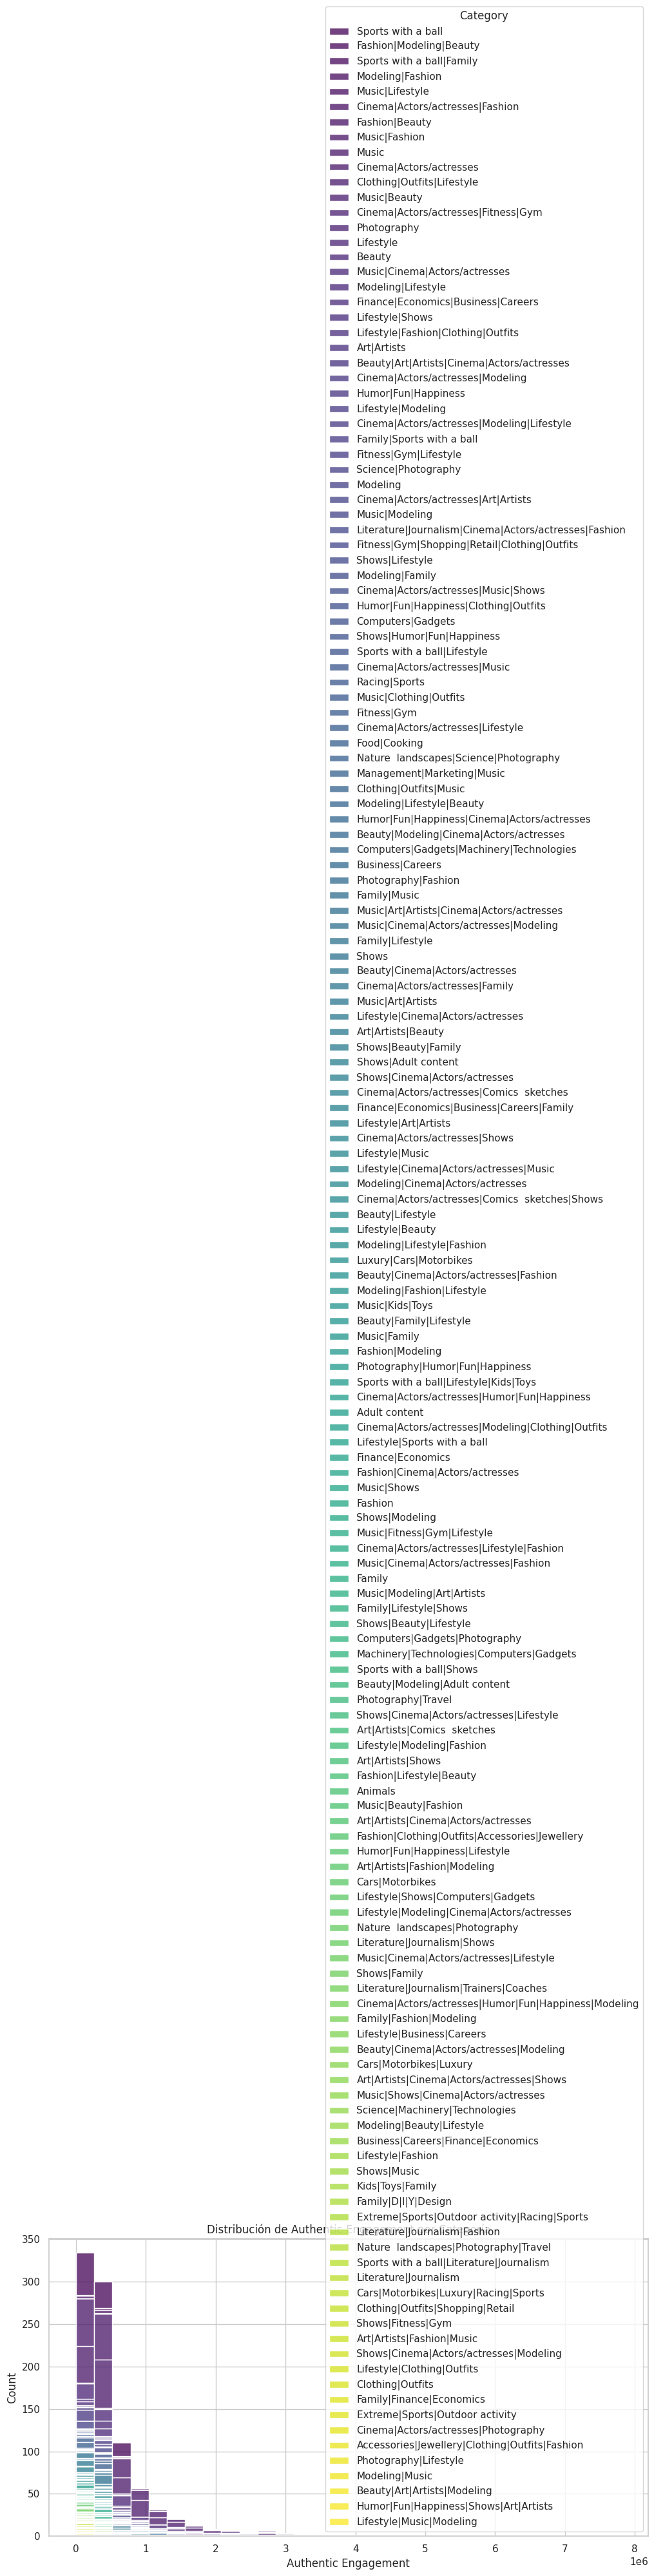

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Authentic engagement', hue='Category', multiple="stack", bins=30, palette='viridis')


plt.xlabel('Authentic Engagement')
plt.ylabel('Count')
plt.title('Distribución de Authentic Engagement por Categoría')


plt.show()

In [ ]:
data['Nueva_Categoria'] = data['Category'].str.split('|').str[0]
data

,Country,Rank,Account,Title,Link,Category,Followers,Audience Country,Authentic engagement,Engagement avg,Scraped,Nueva_Categoria
0,All,1,cristiano,Cristiano Ronaldo,https://www.instagram.com/cristiano/,Sports with a ball,400100000.0,India,7800000.0,9500000.0,2022-02-07 16:50:24.798803,Sports with a ball
1,All,2,kyliejenner,Kylie 🤍,https://www.instagram.com/kyliejenner/,Fashion|Modeling|Beauty,308800000.0,United States,6200000.0,10100000.0,2022-02-07 16:50:24.798803,Fashion
2,All,3,leomessi,Leo Messi,https://www.instagram.com/leomessi/,Sports with a ball|Family,306300000.0,Argentina,4800000.0,6500000.0,2022-02-07 16:50:24.798803,Sports with a ball
3,All,4,kendalljenner,Kendall,https://www.instagram.com/kendalljenner/,Modeling|Fashion,217800000.0,United States,3400000.0,5400000.0,2022-02-07 16:50:24.798803,Modeling
4,All,5,selenagomez,Selena Gomez,https://www.instagram.com/selenagomez/,Music|Lifestyle,295800000.0,United States,2700000.0,3600000.0,2022-02-07 16:50:24.798803,Music
...,...,...,...,...,...,...,...,...,...,...,...,...
995,All,996,senoritasaeva,Dina Saeva,https://www.instagram.com/senoritasaeva/,Lifestyle|Music|Modeling,7700000.0,Russia,246600.0,318200.0,2022-02-07 16:50:24.798803,Lifestyle
996,All,997,manuelneuer,Manuel Neuer,https://www.instagram.com/manuelneuer/,Sports with a ball,11500000.0,Germany,146500.0,210200.0,2022-02-07 16:50:24.798803,Sports with a ball
997,All,998,sahilkhan,India’s Youth & Fitness IC⭕️N®,https://www.instagram.com/sahilkhan/,Fitness|Gym,10100000.0,India,176500.0,239800.0,2022-02-07 16:50:24.798803,Fitness
998,All,999,mohanshakti,Shakti Mohan,https://www.instagram.com/mohanshakti/,Art|Artists|Cinema|Actors/actresses,13700000.0,India,146400.0,175500.0,2022-02-07 16:50:24.798803,Art


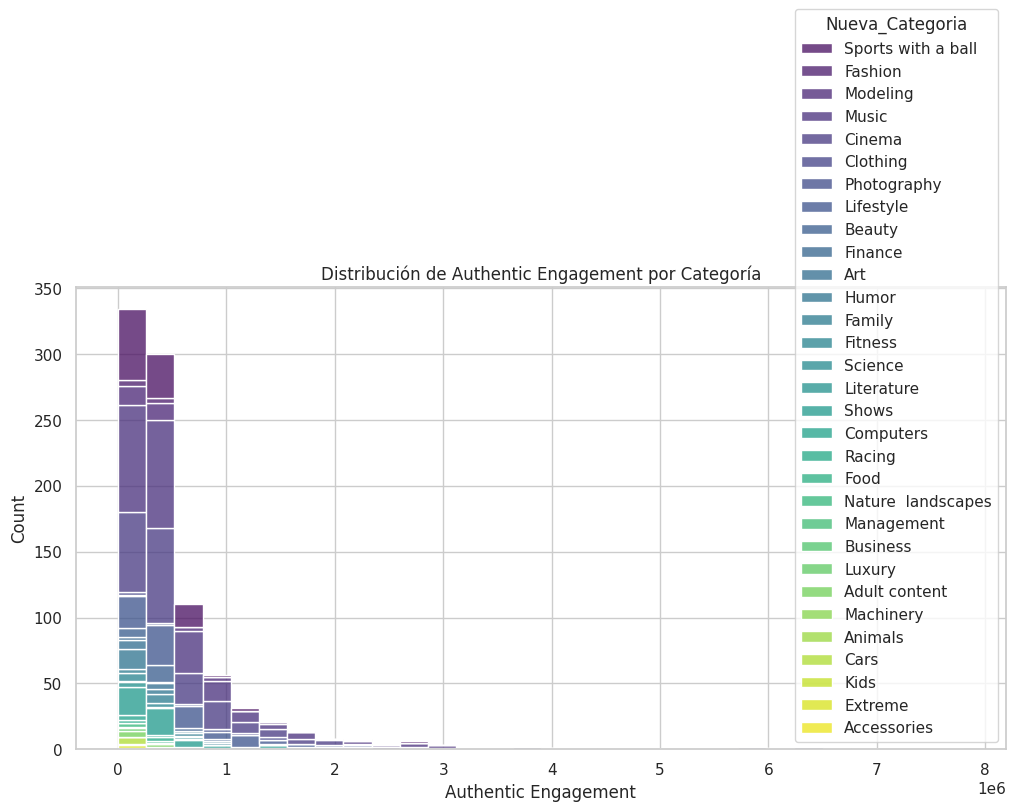

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='Authentic engagement', hue='Nueva_Categoria', multiple="stack", bins=30, palette='viridis')

plt.xlabel('Authentic Engagement')
plt.ylabel('Count')
plt.title('Distribución de Authentic Engagement por Categoría')


plt.show()

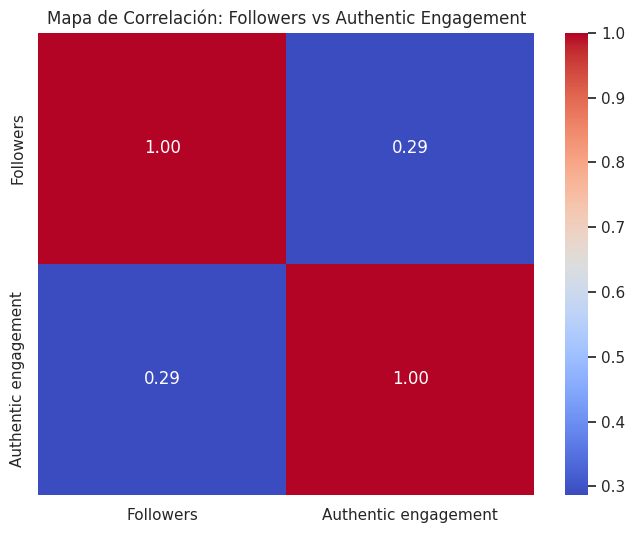

In [ ]:
correlation_matrix = data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación: Followers vs Authentic Engagement')

plt.show()

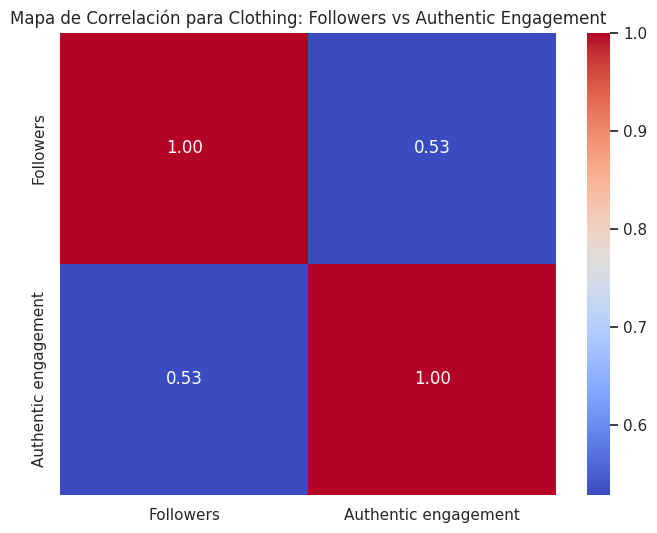

In [ ]:
clothing_data = data[data['Nueva_Categoria'] == 'Clothing']

correlation_matrix_clothing = clothing_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_clothing, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Clothing: Followers vs Authentic Engagement')

plt.show()

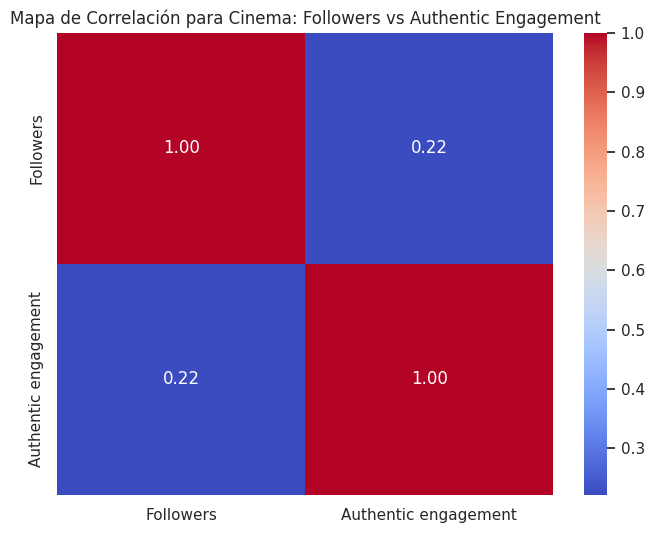

In [ ]:
cinema_data = data[data['Nueva_Categoria'] == 'Cinema']

correlation_matrix_cinema = cinema_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_cinema, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Cinema: Followers vs Authentic Engagement')

plt.show()

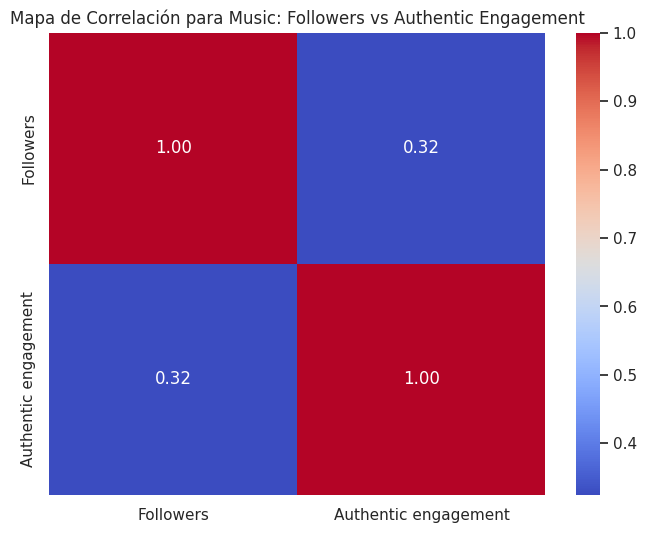

In [ ]:
music_data = data[data['Nueva_Categoria'] == 'Music']

correlation_matrix_music = music_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_music, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Music: Followers vs Authentic Engagement')

plt.show()

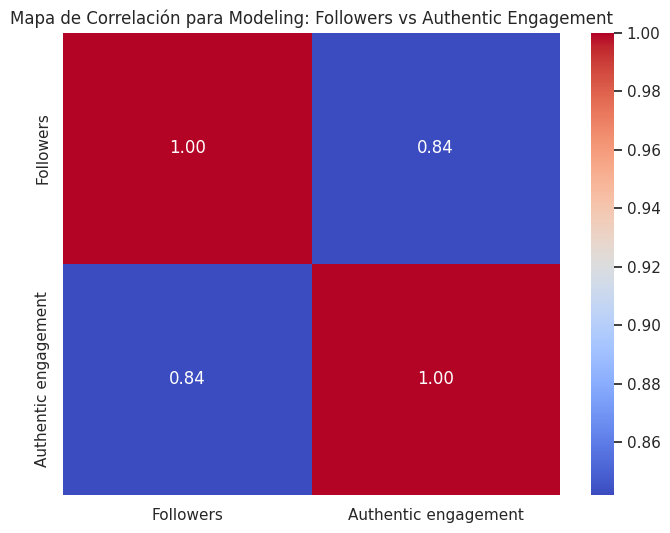

In [ ]:
modeling_data = data[data['Nueva_Categoria'] == 'Modeling']

correlation_matrix_modeling = modeling_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_modeling, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Modeling: Followers vs Authentic Engagement')

plt.show()

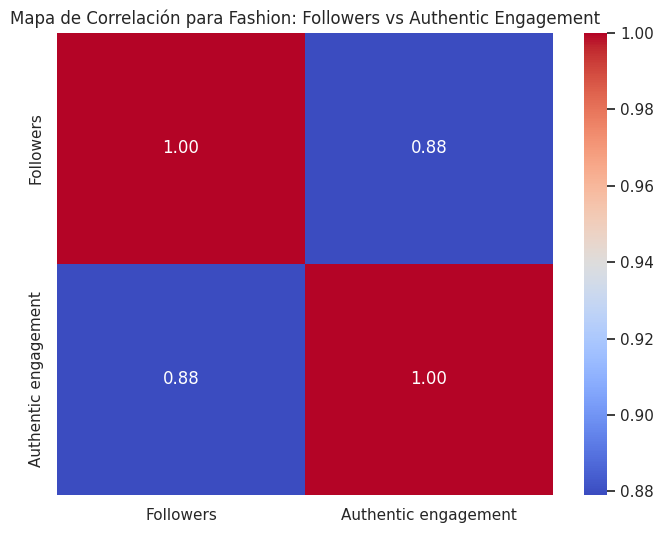

In [ ]:
fashion_data = data[data['Nueva_Categoria'] == 'Fashion']

correlation_matrix_fashion = fashion_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_fashion, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Fashion: Followers vs Authentic Engagement')

plt.show()

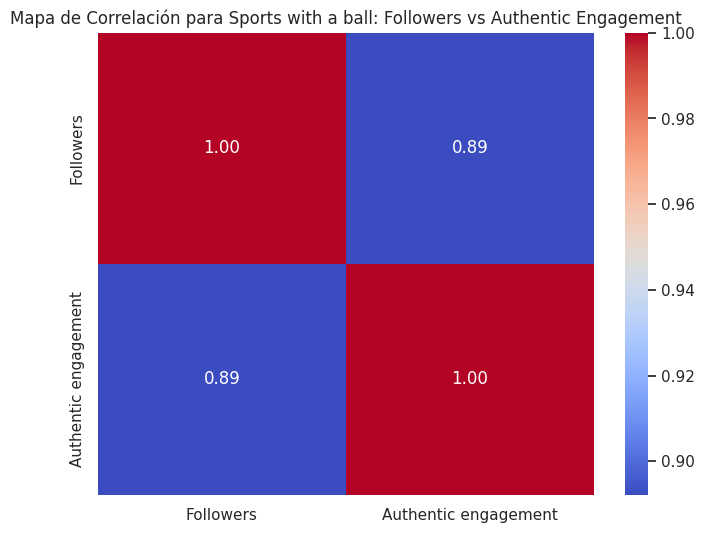

In [ ]:
sports_data = data[data['Nueva_Categoria'] == 'Sports with a ball']

correlation_matrix_sports = sports_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_sports, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Sports with a ball: Followers vs Authentic Engagement')

plt.show()

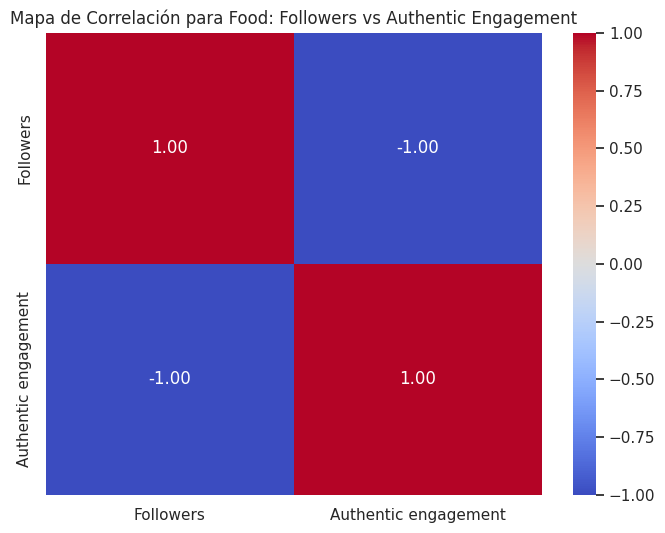

In [ ]:
food_data = data[data['Nueva_Categoria'] == 'Food']

correlation_matrix_food = food_data[['Followers', 'Authentic engagement']].corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_food, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Mapa de Correlación para Food: Followers vs Authentic Engagement')

plt.show()

## **Segunda base de datos**
SMI Datasett.sav

In [ ]:
uploaded_data = files.upload ()

Saving SMI Datasett.sav to SMI Datasett (2).sav


In [ ]:
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 28.8 MB/s eta 0:00:00


In [ ]:
!apt-get install -y python3-pyreadstat

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package python3-pyreadstat


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

nombre_archivo = list(uploaded.keys())[0]

datos2 = pd.read_spss(nombre_archivo)

datos2

Saving SMI Datasett.sav to SMI Datasett (3).sav


,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,35-44,Male,Some college/Associate's degree,"$25,000-$49,999",Often (2-3 times a week),Yes,Sometimes (once every few months),5,Very much,$25-$50
1,45-54,Female,Bachelor's degree,"$25,000-$49,999",Sometimes (once a week),Yes,Never,9,Moderately,$50-$100
2,25-34,Male,Some college/Associate's degree,"$25,000-$49,999",Rarely (Once a month or less),No,Rarely (once a year),1,Not at all,$25-$50
3,18-24,Female,Bachelor's degree,"$75,000-$99,999",Sometimes (once a week),Yes,Sometimes (once every few months),3,Moderately,Less than $25
4,25-34,Male,Bachelor's degree,"$50,000-$74,999",Rarely (Once a month or less),Yes,Occasioally (2-3 times a year),6,Not at all,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,18-24,Female,Some college/Associate's degree,"$25,000-$49,999",Occasionally (2-3 times a month),Yes,Rarely (once a year),5,Very much,$50-$100
209,18-24,Male,Bachelor's degree,"$50,000-$74,999",Occasionally (2-3 times a month),No,Often (once a month),3,Moderately,Less than $25
210,25-34,Female,Bachelor's degree,"$25,000-$49,999",Sometimes (once a week),No,Often (once a month),8,Moderately,$50-$100
211,25-34,Non-binary/other,Some college/Associate's degree,"$25,000-$49,999",Sometimes (once a week),No,Very often (2-3 times a month),4,Moderately,$50-$100


In [ ]:
categorias_unicas2 = datos2['Age'].unique()

print("Categorías únicas:")
for Age in categorias_unicas2:
    print(Age)

Categorías únicas:
35-44
45-54
25-34
18-24
55+


Etiquetas:


*   18-24 = 1
*   25-34 = 2
*   35-44 = 3
*   45-54 = 4
*   55+ = 5








In [ ]:
datos2_copia = datos2.copy()

# Definir el mapeo de valores
mapeo_edades = {
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

# Aplicar el mapeo a la columna 'Age'
datos2_copia['Age'] = datos2_copia['Age'].map(mapeo_edades)

# Asegurarse de que la columna 'Age' sea de tipo numérico
datos2_copia['Age'] = pd.to_numeric(datos2_copia['Age'])

# Verificar los cambios
print(datos2_copia.head())

   Age  Gender                   EducationLevel           Income  \
0    3    Male  Some college/Associate's degree  $25,000-$49,999   
1    4  Female                Bachelor's degree  $25,000-$49,999   
2    2    Male  Some college/Associate's degree  $25,000-$49,999   
3    1  Female                Bachelor's degree  $75,000-$99,999   
4    2    Male                Bachelor's degree  $50,000-$74,999   

                  SocialMediaUse FollowSMIPromotingBeautyProducts  \
0       Often (2-3 times a week)                              Yes   
1        Sometimes (once a week)                              Yes   
2  Rarely (Once a month or less)                               No   
3        Sometimes (once a week)                              Yes   
4  Rarely (Once a month or less)                              Yes   

  FrequencyofPurchasingBeautyProducts InfluenceofSMI  \
0   Sometimes (once every few months)              5   
1                               Never              9   
2       

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,Male,Some college/Associate's degree,"$25,000-$49,999",Often (2-3 times a week),Yes,Sometimes (once every few months),5,Very much,$25-$50
1,4,Female,Bachelor's degree,"$25,000-$49,999",Sometimes (once a week),Yes,Never,9,Moderately,$50-$100
2,2,Male,Some college/Associate's degree,"$25,000-$49,999",Rarely (Once a month or less),No,Rarely (once a year),1,Not at all,$25-$50
3,1,Female,Bachelor's degree,"$75,000-$99,999",Sometimes (once a week),Yes,Sometimes (once every few months),3,Moderately,Less than $25
4,2,Male,Bachelor's degree,"$50,000-$74,999",Rarely (Once a month or less),Yes,Occasioally (2-3 times a year),6,Not at all,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,Female,Some college/Associate's degree,"$25,000-$49,999",Occasionally (2-3 times a month),Yes,Rarely (once a year),5,Very much,$50-$100
209,1,Male,Bachelor's degree,"$50,000-$74,999",Occasionally (2-3 times a month),No,Often (once a month),3,Moderately,Less than $25
210,2,Female,Bachelor's degree,"$25,000-$49,999",Sometimes (once a week),No,Often (once a month),8,Moderately,$50-$100
211,2,Non-binary/other,Some college/Associate's degree,"$25,000-$49,999",Sometimes (once a week),No,Very often (2-3 times a month),4,Moderately,$50-$100


In [ ]:
categorias_unicas2 = datos2['Income'].unique()

print("Categorías únicas:")
for Income in categorias_unicas2:
    print(Income)

Categorías únicas:
$25,000-$49,999
$75,000-$99,999
$50,000-$74,999
Less than $25,000
$100,000 or more


Etiquetas:
(Less than $25,000 = 1), ($25,000-$49,999 = 2), ($50,000-$74,999 = 3), ($75,000-$99,999 = 4), ($100,000 or more = 5)




In [ ]:
mapeo_income = {
    'Less than $25,000': 1,
    '$25,000-$49,999': 2,
    '$50,000-$74,999': 3,
    '$75,000-$99,999': 4,
    '$100,000 or more': 5
}

# Aplicar el mapeo a la columna 'Age'
datos2_copia['Income'] = datos2_copia['Income'].map(mapeo_income)

# Asegurarse de que la columna 'Age' sea de tipo numérico
datos2_copia['Income'] = pd.to_numeric(datos2_copia['Income'])

# Verificar los cambios
print(datos2_copia.head())

   Age  Gender                   EducationLevel  Income  \
0    3    Male  Some college/Associate's degree       2   
1    4  Female                Bachelor's degree       2   
2    2    Male  Some college/Associate's degree       2   
3    1  Female                Bachelor's degree       4   
4    2    Male                Bachelor's degree       3   

                  SocialMediaUse FollowSMIPromotingBeautyProducts  \
0       Often (2-3 times a week)                              Yes   
1        Sometimes (once a week)                              Yes   
2  Rarely (Once a month or less)                               No   
3        Sometimes (once a week)                              Yes   
4  Rarely (Once a month or less)                              Yes   

  FrequencyofPurchasingBeautyProducts InfluenceofSMI  \
0   Sometimes (once every few months)              5   
1                               Never              9   
2                Rarely (once a year)              1   
3   So

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,Male,Some college/Associate's degree,2,Often (2-3 times a week),Yes,Sometimes (once every few months),5,Very much,$25-$50
1,4,Female,Bachelor's degree,2,Sometimes (once a week),Yes,Never,9,Moderately,$50-$100
2,2,Male,Some college/Associate's degree,2,Rarely (Once a month or less),No,Rarely (once a year),1,Not at all,$25-$50
3,1,Female,Bachelor's degree,4,Sometimes (once a week),Yes,Sometimes (once every few months),3,Moderately,Less than $25
4,2,Male,Bachelor's degree,3,Rarely (Once a month or less),Yes,Occasioally (2-3 times a year),6,Not at all,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,Female,Some college/Associate's degree,2,Occasionally (2-3 times a month),Yes,Rarely (once a year),5,Very much,$50-$100
209,1,Male,Bachelor's degree,3,Occasionally (2-3 times a month),No,Often (once a month),3,Moderately,Less than $25
210,2,Female,Bachelor's degree,2,Sometimes (once a week),No,Often (once a month),8,Moderately,$50-$100
211,2,Non-binary/other,Some college/Associate's degree,2,Sometimes (once a week),No,Very often (2-3 times a month),4,Moderately,$50-$100


In [ ]:
categorias_unicas2 = datos2['SocialMediaUse'].unique()

print("Categorías únicas:")
for SocialMediaUse in categorias_unicas2:
    print(SocialMediaUse)

Categorías únicas:
Often (2-3 times a week)
Sometimes (once a week)
Rarely (Once a month or less)
Never
Occasionally (2-3 times a month)
Very often (daily)


Etiquetas:


*   Never = 1
*   Rarely (Once a month or less) = 2
*   Occasionally (2-3 times a month) = 3
*   Sometimes (once a week) = 4
*   Often (2-3 times a week) = 5
*   Very often (daily) = 6





In [ ]:

mapeo_social_media = {
    'Never': 1,
    'Rarely (Once a month or less)': 2,
    'Occasionally (2-3 times a month)': 3,
    'Sometimes (once a week)': 4,
    'Often (2-3 times a week)': 5,
    'Very often (daily)': 6
}

# Aplicar el mapeo a la columna 'SocialMediaUse'
datos2_copia['SocialMediaUse'] = datos2_copia['SocialMediaUse'].apply(lambda x: mapeo_social_media.get(x.strip(), x))

# Asegurarse de que la columna 'SocialMediaUse' sea de tipo numérico
datos2_copia['SocialMediaUse'] = pd.to_numeric(datos2_copia['SocialMediaUse'], errors='coerce')

# Verificar los cambios
print(datos2_copia.head())

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,Male,Some college/Associate's degree,2,5,Yes,Sometimes (once every few months),5,Very much,$25-$50
1,4,Female,Bachelor's degree,2,4,Yes,Never,9,Moderately,$50-$100
2,2,Male,Some college/Associate's degree,2,2,No,Rarely (once a year),1,Not at all,$25-$50
3,1,Female,Bachelor's degree,4,4,Yes,Sometimes (once every few months),3,Moderately,Less than $25
4,2,Male,Bachelor's degree,3,2,Yes,Occasioally (2-3 times a year),6,Not at all,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,Female,Some college/Associate's degree,2,3,Yes,Rarely (once a year),5,Very much,$50-$100
209,1,Male,Bachelor's degree,3,3,No,Often (once a month),3,Moderately,Less than $25
210,2,Female,Bachelor's degree,2,4,No,Often (once a month),8,Moderately,$50-$100
211,2,Non-binary/other,Some college/Associate's degree,2,4,No,Very often (2-3 times a month),4,Moderately,$50-$100


In [ ]:
categorias_unicas2 = datos2['TrustofSMIRecommendations'].unique()

print("Categorías únicas:")
for TrustofSMIRecommendations in categorias_unicas2:
    print(TrustofSMIRecommendations)

Categorías únicas:
Very much
Moderately
Not at all
Somewhat
Completely


Etiquetas:

*   Not at all = 1
*   Somewhat = 2
*   Moderately = 3
*   Very much= 4
*   Completely = 5






In [ ]:
mapeo_TrustofSMIRecommendations = {
    'Not at all': 1,
    'Somewhat': 2,
    'Moderately': 3,
    'Very much': 4,
    'Completely': 5
}

# Aplicar el mapeo a la columna 'TrustofSMIRecommendations'
datos2_copia['TrustofSMIRecommendations'] = datos2_copia['TrustofSMIRecommendations'].apply(lambda x: mapeo_TrustofSMIRecommendations.get(x.strip(), x))

# Asegurarse de que la columna 'TrustofSMIRecommendations' sea de tipo numérico
datos2_copia['TrustofSMIRecommendations'] = pd.to_numeric(datos2_copia['TrustofSMIRecommendations'], errors='coerce')

# Verificar los cambios
print(datos2_copia.head())

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,Male,Some college/Associate's degree,2,5,Yes,Sometimes (once every few months),5,4,$25-$50
1,4,Female,Bachelor's degree,2,4,Yes,Never,9,3,$50-$100
2,2,Male,Some college/Associate's degree,2,2,No,Rarely (once a year),1,1,$25-$50
3,1,Female,Bachelor's degree,4,4,Yes,Sometimes (once every few months),3,3,Less than $25
4,2,Male,Bachelor's degree,3,2,Yes,Occasioally (2-3 times a year),6,1,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,Female,Some college/Associate's degree,2,3,Yes,Rarely (once a year),5,4,$50-$100
209,1,Male,Bachelor's degree,3,3,No,Often (once a month),3,3,Less than $25
210,2,Female,Bachelor's degree,2,4,No,Often (once a month),8,3,$50-$100
211,2,Non-binary/other,Some college/Associate's degree,2,4,No,Very often (2-3 times a month),4,3,$50-$100


In [ ]:
categorias_unicas2 = datos2['EducationLevel'].unique()

print("Categorías únicas:")
for EducationLevel in categorias_unicas2:
    print(EducationLevel)

Categorías únicas:
Some college/Associate's degree
Bachelor's degree
High school diploma or less
Master's degree or higher


Etiquetas:

*   Some college/Associate's degree =1
*   High school diploma or less = 2
*   Bachelor's degree = 3
*   Master's degree or higher = 4



In [ ]:
mapeo_EducationLevel = {
    "Some college/Associate's degree": 1,
    "High school diploma or less": 2,
    "Bachelor's degree": 3,
    "Master's degree or higher": 4
}

# Aplicar el mapeo a la columna 'TrustofSMIRecommendations'
datos2_copia['EducationLevel'] = datos2_copia['EducationLevel'].apply(lambda x: mapeo_EducationLevel.get(x.strip(), x))

# Asegurarse de que la columna 'EducationLevel' sea de tipo numérico
datos2_copia['EducationLevel'] = pd.to_numeric(datos2_copia['EducationLevel'], errors='coerce')

# Verificar los cambios
print(datos2_copia.head())

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,Male,1,2,5,Yes,Sometimes (once every few months),5,4,$25-$50
1,4,Female,3,2,4,Yes,Never,9,3,$50-$100
2,2,Male,1,2,2,No,Rarely (once a year),1,1,$25-$50
3,1,Female,3,4,4,Yes,Sometimes (once every few months),3,3,Less than $25
4,2,Male,3,3,2,Yes,Occasioally (2-3 times a year),6,1,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,Female,1,2,3,Yes,Rarely (once a year),5,4,$50-$100
209,1,Male,3,3,3,No,Often (once a month),3,3,Less than $25
210,2,Female,3,2,4,No,Often (once a month),8,3,$50-$100
211,2,Non-binary/other,1,2,4,No,Very often (2-3 times a month),4,3,$50-$100


In [ ]:
categorias_unicas2 = datos2['Gender'].unique()

print("Categorías únicas:")
for Gender in categorias_unicas2:
    print(Gender)

Categorías únicas:
Male
Female
Non-binary/other


Etiquetas:

*   Male = 1
*   Female = 2
*   Non-binary/other = 3




In [ ]:
mapeo_Gender = {
    "Male": 1,
    "Female": 2,
    "Non-binary/other": 3
}

# Aplicar el mapeo a la columna 'TrustofSMIRecommendations'
datos2_copia['Gender'] = datos2_copia['Gender'].apply(lambda x: mapeo_Gender.get(x.strip(), x))

# Asegurarse de que la columna 'Gender' sea de tipo numérico
datos2_copia['Gender'] = pd.to_numeric(datos2_copia['Gender'], errors='coerce')

# Verificar los cambios
print(datos2_copia.head())

In [ ]:
datos2_copia

,Age,Gender,EducationLevel,Income,SocialMediaUse,FollowSMIPromotingBeautyProducts,FrequencyofPurchasingBeautyProducts,InfluenceofSMI,TrustofSMIRecommendations,AmountSpentonBeautyProductsperMonth
0,3,1,1,2,5,Yes,Sometimes (once every few months),5,4,$25-$50
1,4,2,3,2,4,Yes,Never,9,3,$50-$100
2,2,1,1,2,2,No,Rarely (once a year),1,1,$25-$50
3,1,2,3,4,4,Yes,Sometimes (once every few months),3,3,Less than $25
4,2,1,3,3,2,Yes,Occasioally (2-3 times a year),6,1,$50-$100
...,...,...,...,...,...,...,...,...,...,...
208,1,2,1,2,3,Yes,Rarely (once a year),5,4,$50-$100
209,1,1,3,3,3,No,Often (once a month),3,3,Less than $25
210,2,2,3,2,4,No,Often (once a month),8,3,$50-$100
211,2,3,1,2,4,No,Very often (2-3 times a month),4,3,$50-$100


In [ ]:
datos2_copia['InfluenceofSMI'] = datos2_copia['InfluenceofSMI'].astype('category')

# Transformar los valores a int64 utilizando cat.codes
datos2_copia['InfluenceofSMI'] = datos2_copia['InfluenceofSMI'].cat.codes.astype('int64')

# Verificar los cambios
print(datos2_copia['InfluenceofSMI'].head())

In [ ]:
datos2_copia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   Age                                  213 non-null    int64   
 1   Gender                               213 non-null    int64   
 2   EducationLevel                       213 non-null    int64   
 3   Income                               213 non-null    int64   
 4   SocialMediaUse                       213 non-null    int64   
 5   FollowSMIPromotingBeautyProducts     213 non-null    category
 6   FrequencyofPurchasingBeautyProducts  213 non-null    category
 7   InfluenceofSMI                       213 non-null    int64   
 8   TrustofSMIRecommendations            213 non-null    int64   
 9   AmountSpentonBeautyProductsperMonth  213 non-null    category
dtypes: category(3), int64(7)
memory usage: 12.9 KB


Mapa de Correlación de todas las variables. Age, Gender, EducationLevel, Income, SocialMediaUse, InfluenceofSMI y TrustofSMIRecommendations.


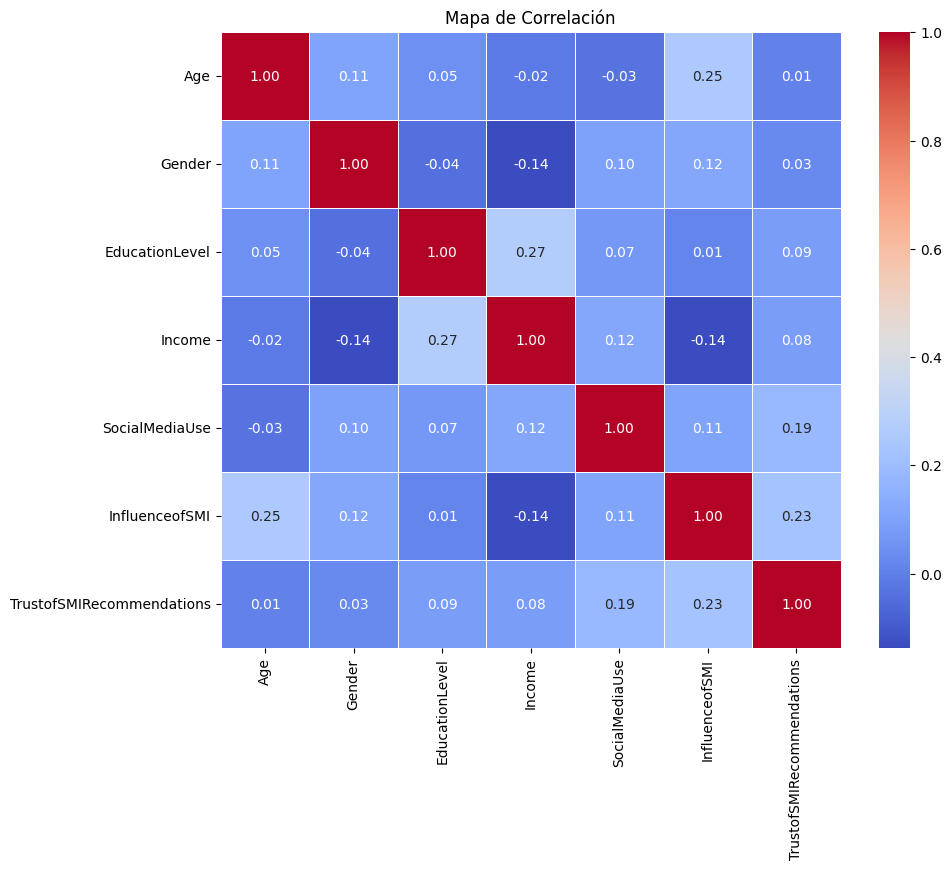

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes el DataFrame 'datos2_copia'
# Si no lo tienes, puedes cargar tus datos desde tu archivo o fuente de datos
# datos2_copia = pd.read_csv("tu_archivo.csv")

# Seleccionar las columnas de interés
columnas_interes = ['Age', 'Gender', 'EducationLevel', 'Income', 'SocialMediaUse', 'InfluenceofSMI', 'TrustofSMIRecommendations']
datos_correlacion = datos2_copia[columnas_interes]

# Calcular la matriz de correlación
matriz_correlacion = datos_correlacion.corr()

# Crear un mapa de correlación usando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Correlación')
plt.show()

In [ ]:
pip install scikit-learn

Prueba como regresión Lineal

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes el DataFrame 'datos2_copia'
# Si no lo tienes, puedes cargar tus datos desde tu archivo o fuente de datos
# datos2_copia = pd.read_csv("tu_archivo.csv")

# Seleccionar las columnas de entrada (variables independientes) y la variable de salida (Income)
variables_entrada = ['Age', 'Gender', 'EducationLevel', 'SocialMediaUse', 'InfluenceofSMI', 'TrustofSMIRecommendations']
variable_salida = 'Income'

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = datos2_copia[variables_entrada]
y = datos2_copia[variable_salida]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento
modelo_regresion.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_regresion.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

# Imprimir los coeficientes y la intercepción del modelo
print('Coeficientes:', modelo_regresion.coef_)
print('Intercepción:', modelo_regresion.intercept_)

Mean Squared Error (MSE): 0.9650279251703361
R-squared (R2): 0.12874187810549254
Coeficientes: [ 0.08160095 -0.23742453  0.21287719  0.062067   -0.06792367  0.07861089]
Intercepción: 2.67790509565118


Prueba regresión polinomica

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que ya tienes el DataFrame 'datos2_copia'
# Si no lo tienes, puedes cargar tus datos desde tu archivo o fuente de datos
# datos2_copia = pd.read_csv("tu_archivo.csv")

# Seleccionar las columnas de entrada (variables independientes) y la variable de salida (Income)
variables_entrada = ['Age', 'Gender', 'EducationLevel', 'SocialMediaUse', 'InfluenceofSMI', 'TrustofSMIRecommendations']
variable_salida = 'Income'

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = datos2_copia[variables_entrada]
y = datos2_copia[variable_salida]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar transformación polinómica a las variables de entrada
grado_polinomio = 2  # Puedes ajustar el grado del polinomio según tus necesidades
poly = PolynomialFeatures(degree=grado_polinomio)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Crear el modelo de regresión lineal con términos polinómicos
modelo_regresion_polinomica = LinearRegression()

# Entrenar el modelo con el conjunto de entrenamiento polinómico
modelo_regresion_polinomica.fit(X_train_poly, y_train)

# Realizar predicciones en el conjunto de prueba polinómico
y_pred_poly = modelo_regresion_polinomica.predict(X_test_poly)

# Evaluar el rendimiento del modelo polinómico
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

# Imprimir los resultados del modelo polinómico
print(f'Mean Squared Error (MSE) - Polinómico: {mse_poly}')
print(f'R-squared (R2) - Polinómico: {r2_poly}')

# Imprimir los coeficientes y la intercepción del modelo polinómico
print('Coeficientes - Polinómico:', modelo_regresion_polinomica.coef_)
print('Intercepción - Polinómico:', modelo_regresion_polinomica.intercept_)

Mean Squared Error (MSE) - Polinómico: 2.121961077978445
R-squared (R2) - Polinómico: -0.9157744302647188
Coeficientes - Polinómico: [ 3.73499926e+12 -7.44581309e-01 -3.56173772e-01 -1.34005602e+00
  4.40725330e-01  7.76498419e-01 -8.76060131e-01  6.97855770e-02
  9.66896281e-02  3.33160533e-01  3.74019516e-02 -1.53961886e-01
  5.26201068e-02 -1.10000034e-01  1.12732411e-01  1.20822078e-01
 -3.27015345e-01  2.85757594e-01  4.02011247e-02  9.64534946e-02
  8.51767973e-02 -9.43656411e-02 -7.25933047e-02  4.12537159e-02
 -1.79874057e-01 -2.03467221e-02 -5.86980456e-03  2.28247570e-01]
Intercepción - Polinómico: -3734999260251.181


K-Means

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Supongamos que ya tienes el DataFrame 'datos2_copia'
# Si no lo tienes, puedes cargar tus datos desde tu archivo o fuente de datos
# datos2_copia = pd.read_csv("tu_archivo.csv")

# Seleccionar las columnas de interés para el clustering
columnas_clustering = ['Age', 'Gender', 'EducationLevel', 'Income', 'SocialMediaUse', 'InfluenceofSMI', 'TrustofSMIRecommendations']

# Seleccionar solo las columnas de interés
datos_clustering = datos2_copia[columnas_clustering]

# Normalizar los datos para que tengan media cero y desviación estándar uno
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos_clustering)

# Determinar el número óptimo de clusters utilizando el método del codo
inercias = []
rango_clusters = range(1, 11)

for k in rango_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(datos_normalizados)
    inercias.append(kmeans.inertia_)

# Graficar el método del codo para ayudar a elegir el número óptimo de clusters
plt.plot(rango_clusters, inercias, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

# Elegir el número óptimo de clusters (en este caso, por ejemplo, 3 clusters)
numero_clusters_optimo = 3

# Aplicar K-Means con el número óptimo de clusters
kmeans = KMeans(n_clusters=numero_clusters_optimo, random_state=42)
datos2_copia['Cluster'] = kmeans.fit_predict(datos_normalizados)

# Visualizar los clusters en un gráfico 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datos2_copia['EducationLevel'], datos2_copia['InfluenceofSMI'], datos2_copia['Income'], c=datos2_copia['Cluster'], cmap='viridis', s=50)
ax.set_xlabel('EducationLevel')
ax.set_ylabel('InfluenceofSMI')
ax.set_zlabel('Income')
ax.set_title('Clusters')
plt.show()

# Imprimir el conteo de muestras en cada cluster
print(datos2_copia['Cluster'].value_counts())

NameError: ignored

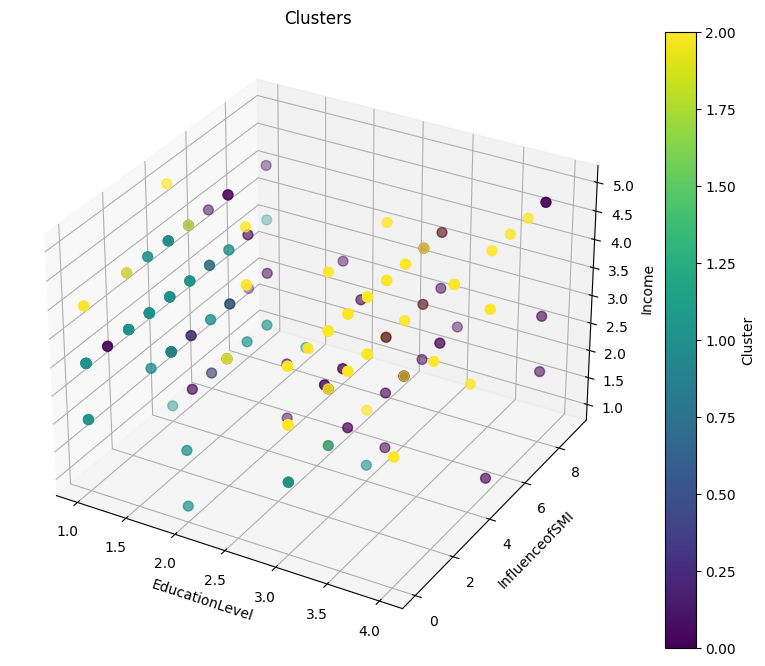

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    datos2_copia['EducationLevel'],
    datos2_copia['InfluenceofSMI'],
    datos2_copia['Income'],
    c=datos2_copia['Cluster'],
    cmap='viridis',
    s=50
)
ax.set_xlabel('EducationLevel')
ax.set_ylabel('InfluenceofSMI')
ax.set_zlabel('Income')
ax.set_title('Clusters')
fig.colorbar(scatter, ax=ax, label='Cluster')
plt.show()

random forest


decision tree
*Teniendo en cuenta Genero y educación*

Regresión Lineal
*Income - social media use*

**Decision tree**
Resultado Income entrada genero, educacion y social media use

Random Forest
resultaod income entrada genero, socialmedia y eduacacion

La matriz de confusión muestra que los modelos tienen dificultades para clasificar correctamente las diferentes categorías de ingresos. Esto podría deberse a la complejidad de la relación entre las variables predictoras (Gender, EducationLevel, SocialMediaUse) y la variable objetivo (Income), que puede no ser bien capturada por modelos lineales.